In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect = True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)
inspector = inspect(engine)

columns_m = inspector.get_columns('measurement')
for column in columns_m:
    print(column['name'], column['type'])


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
columns_s = inspector.get_columns('station')
for column in columns_s:
    print(column['name'], column['type'])


id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

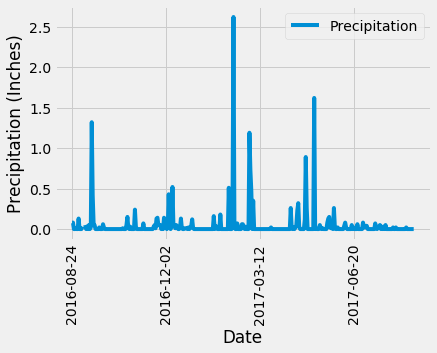

In [70]:
# Design a query to retrieve the last 12 months of precipitation data and plot the result
# Calculate the date 1 year ago from the last data point in the database
last_date = session.query(func.max(Measurement.date)).all()

# Perform a query to retrieve the data and precipitation scores
prcp_scores = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-24").\
                group_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
prcp_df = pd.DataFrame(prcp_scores, columns=['Date', 'Precipitation'])
date_index = prcp_df.set_index('Date')


# Use Pandas Plotting with Matplotlib to plot the data
date_index.plot(rot = '90')
plt.ylabel('Precipitation (Inches)')
plt.xlabel('Date')
plt.show()

In [52]:
 # Use Pandas to calcualte the summary statistics for the precipitation data
date_index.describe()

,Precipitation
count,363.000000
mean,0.048843
std,0.205197
min,0.000000
25%,0.000000
50%,0.000000
75%,0.020000
max,2.620000


In [33]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(func.count(Station.station)).all()
stations

[(9)]

In [55]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_active = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

for station in most_active:
    print(station)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [60]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
usc_most_active = session.query(Measurement.station, Measurement.tobs).filter(Measurement.station == 'USC00519281')
usc_df = pd.DataFrame(usc_most_active, columns = ['Station', 'Tobs'])
usc_df.describe()

,Tobs
count,2772.000000
mean,71.663781
std,4.357642
min,54.000000
25%,69.000000
50%,72.000000
75%,74.000000
max,85.000000


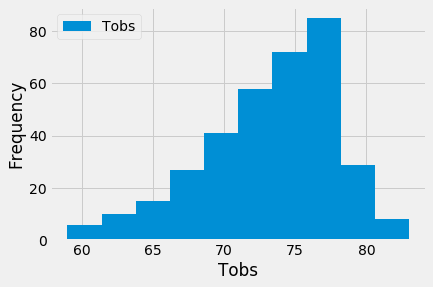

In [69]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
histogram = session.query(Measurement.date, Measurement.station, Measurement.tobs).filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= '2016-08-24').order_by(Measurement.date).all()
histogram_df = pd.DataFrame(histogram, columns = ['Date', 'Station', 'Tobs'])
index_date = histogram_df.set_index('Date')
index_date.plot(kind = 'hist')
plt.xlabel('Tobs')
plt.show()